<a href="https://colab.research.google.com/github/Zaidkarim6204/student-performance-analysis/blob/main/student_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Upload CSV file
from google.colab import files
uploaded = files.upload()

# 3. Load CSV into DataFrame
df = pd.read_csv(list(uploaded.keys())[0])

# 4. Explore the data
print("First 5 rows:")
print(df.head())

print("\nDataset shape:", df.shape)

print("\nColumn info:")
print(df.info())

Saving StudentsPerformance.csv to StudentsPerformance.csv
First 5 rows:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Dataset shape: (1000, 8)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeInde

In [ ]:
# 1. Check missing values
print("Missing values per column:")
print(df.isnull().sum())

# 2. Check duplicates
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()

# 3. Clean column names (remove extra spaces, lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print("\nCleaned column names:")
print(df.columns)

# 4. Preview cleaned data
df.head()

Missing values per column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Number of duplicate rows: 0

Cleaned column names:
Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Summary statistics for numeric columns
print(df.describe())

# Summary for categorical columns
print("\nCategorical column summary:")
print(df.describe(include=['object']))

# Check unique values in each column
for col in df.columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Categorical column summary:
        gender race/ethnicity parental_level_of_education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   

       test_preparation_course  
count                     1000  
unique                       2  
top                       none  
freq                       642  

Unique values in 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

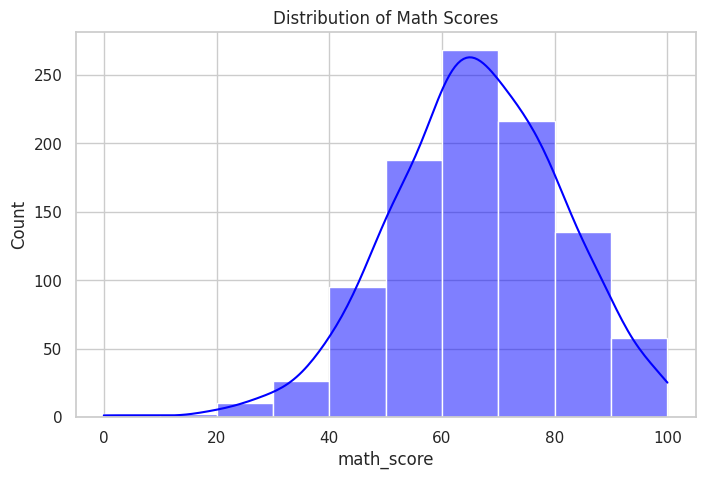

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['math_score'], bins=10, kde=True, color='blue')
plt.title('Distribution of Math Scores')
plt.show()

/tmp/ipython-input-1337852037.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='math_score', data=df, ci=None, palette='viridis')
/tmp/ipython-input-1337852037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='math_score', data=df, ci=None, palette='viridis')


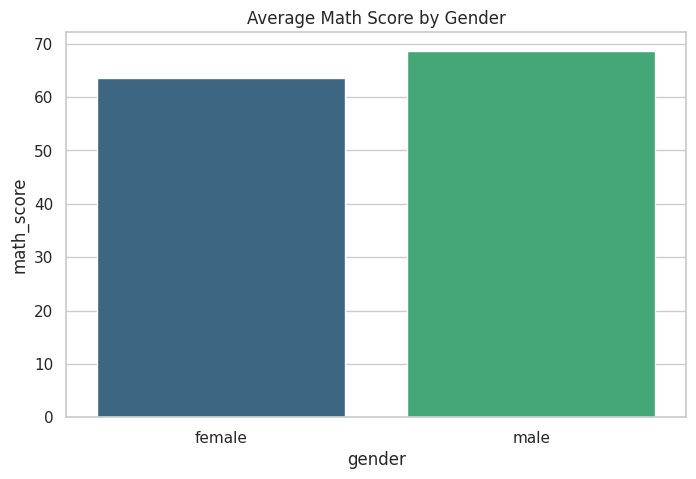

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender', y='math_score', data=df, ci=None, palette='viridis')
plt.title('Average Math Score by Gender')
plt.show()

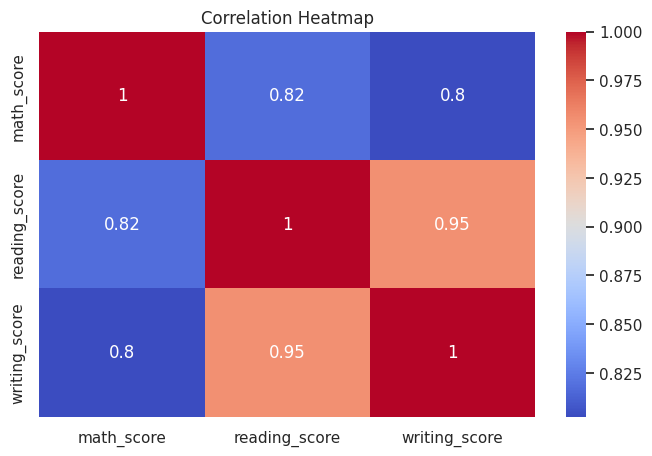

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/tmp/ipython-input-3351620893.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='math_score', data=df, errorbar=None, palette='viridis')


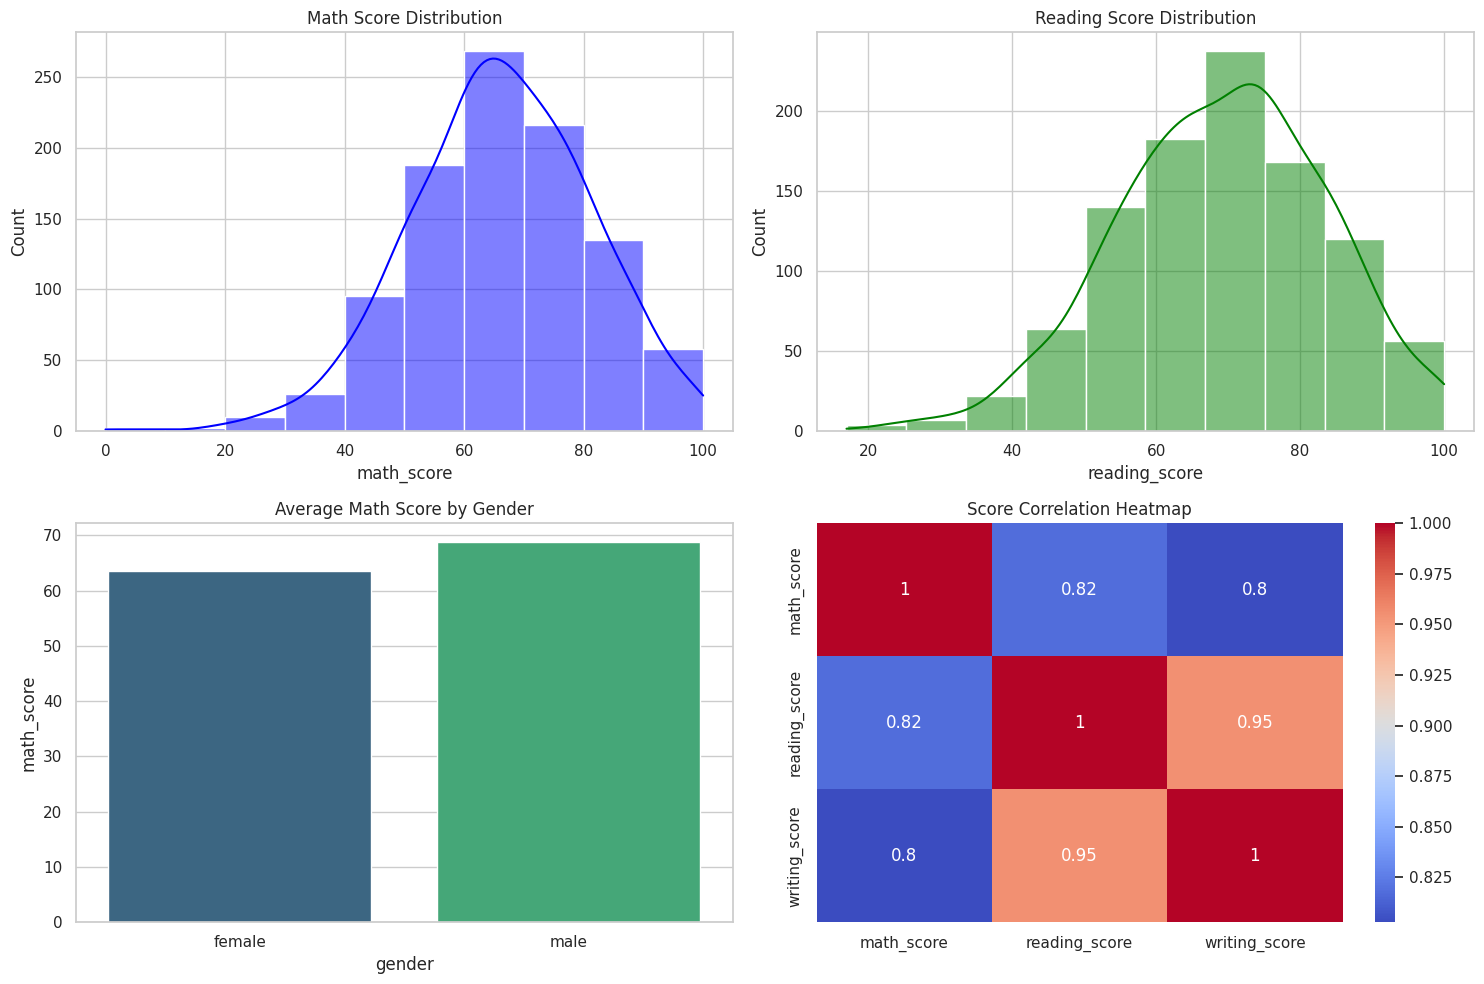

In [ ]:
plt.figure(figsize=(15,10))

# 1: Math Score Distribution
plt.subplot(2,2,1)
sns.histplot(df['math_score'], bins=10, kde=True, color='blue')
plt.title('Math Score Distribution')

# 2: Reading Score Distribution
plt.subplot(2,2,2)
sns.histplot(df['reading_score'], bins=10, kde=True, color='green')
plt.title('Reading Score Distribution')

# 3: Average Math Score by Gender
plt.subplot(2,2,3)
sns.barplot(x='gender', y='math_score', data=df, errorbar=None, palette='viridis')
plt.title('Average Math Score by Gender')

# 4: Correlation Heatmap
plt.subplot(2,2,4)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Score Correlation Heatmap')

plt.tight_layout()
plt.show()

In [ ]:
summary = df[['math_score', 'reading_score', 'writing_score']].describe()
summary

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
print(" Insights from Student Performance Data:\n")

# Average scores
avg_math = df['math_score'].mean()
avg_reading = df['reading_score'].mean()
avg_writing = df['writing_score'].mean()

print(f"Average Math Score: {avg_math:.2f}")
print(f"Average Reading Score: {avg_reading:.2f}")
print(f"Average Writing Score: {avg_writing:.2f}")

# Highest and lowest
print(f"\nHighest Math Score: {df['math_score'].max()}")
print(f"Lowest Math Score: {df['math_score'].min()}")

# Correlation check
corr = df.corr(numeric_only=True)
print(f"\nMath & Reading Correlation: {corr.loc['math_score','reading_score']:.2f}")
print(f"Reading & Writing Correlation: {corr.loc['reading_score','writing_score']:.2f}")

 Insights from Student Performance Data:

Average Math Score: 66.09
Average Reading Score: 69.17
Average Writing Score: 68.05

Highest Math Score: 100
Lowest Math Score: 0

Math & Reading Correlation: 0.82
Reading & Writing Correlation: 0.95


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Mount Google Drive (if you haven't already)
from google.colab import drive
drive.mount('/content/drive')

# Provide the correct path, ensuring the capitalization is correct for all folders and the filename
file_path = '/content/drive/MyDrive/Colab Notebooks/student_performance_dashboard/data/StudentsPerformance.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows to confirm it worked
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
import pandas as pd

# Correct path in Colab
df = pd.read_csv("/content/StudentsPerformance.csv")

# Display first 5 rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# 1. Basic info about the dataset
df.info()

# 2. Summary statistics for numeric columns
df.describe()

# 3. Check for missing values
df.isnull().sum()

# 4. First 10 rows for a quick look
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
# 1. Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# 2. Handle missing values (you can fill or drop)
# Example: fill missing numeric values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# 3. If there are categorical columns with missing values, fill with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 4. Verify that missing values are handled
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


/tmp/ipython-input-3375624386.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Shape of dataset: (1000, 8)

Column names:
 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Summary statistics:
        math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Data types:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int

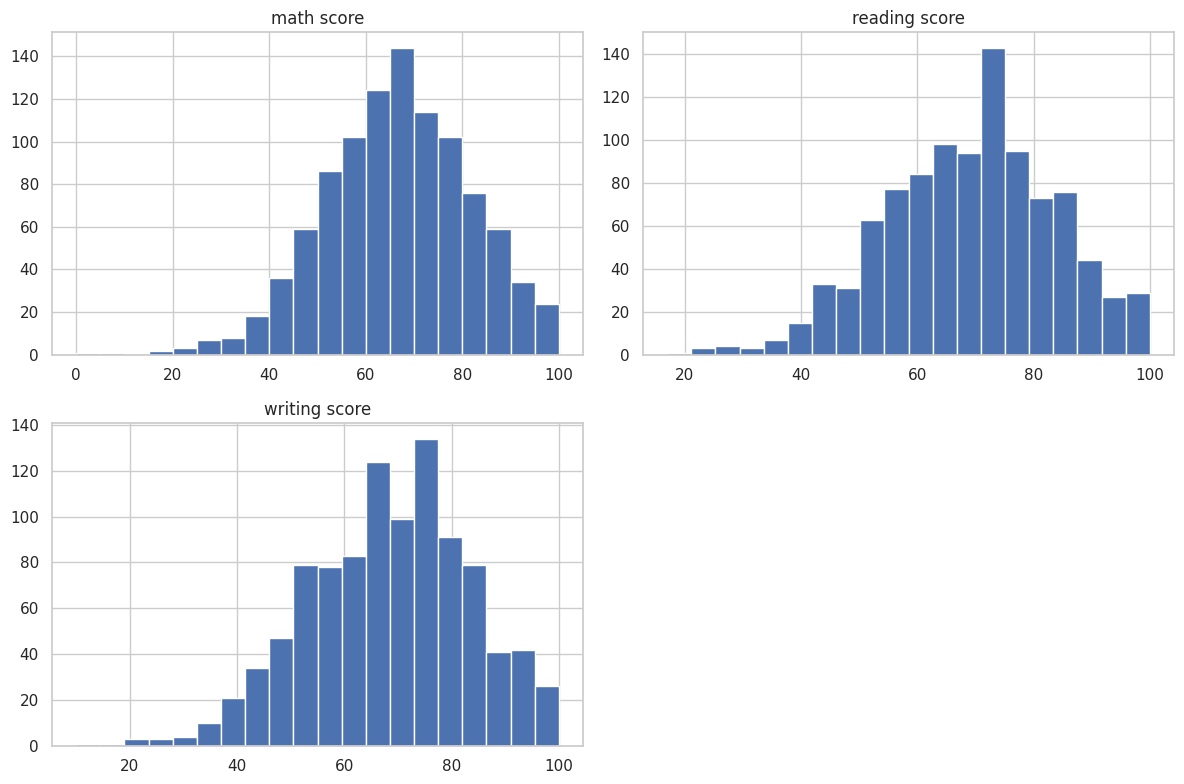

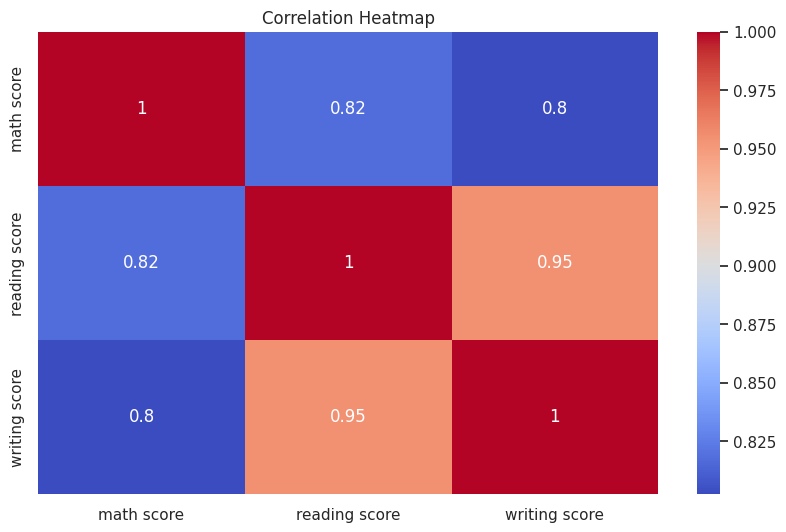

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic dataset overview
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns)
print("\nSummary statistics:\n", df.describe())

# 2. Check data types
print("\nData types:\n", df.dtypes)

# 3. Quick distribution check for numeric columns
df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

# 4. Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# 📌 Data Exploration

# 1. Shape of the dataset
print("Shape of dataset:", df.shape)

# 2. Column names
print("\nColumn Names:", df.columns.tolist())

# 3. First 5 rows
print("\nFirst 5 rows of the dataset:")
display(df.head())

# 4. Dataset information
print("\nDataset Info:")
df.info()

# 5. Summary statistics
print("\nSummary Statistics:")
display(df.describe())

# 6. Missing values check
print("\nMissing Values:")
print(df.isnull().sum())

# 7. Unique values in each column
print("\nUnique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# 8. Sample distribution for categorical columns
print("\nSample Value Counts (Categorical Columns):")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:\n{df[col].value_counts()}")

Shape of dataset: (1000, 8)

Column Names: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

First 5 rows of the dataset:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

Summary Statistics:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Unique Values in Each Column:
gender: 2 unique values
race/ethnicity: 5 unique values
parental level of education: 6 unique values
lunch: 2 unique values
test preparation course: 2 unique values
math score: 81 unique values
reading score: 72 unique values
writing score: 77 unique values

Sample Value Counts (Categorical Columns):

gender:
gender
female    518
male      482
Name: count, dtype: int64

race/ethnicity:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental level of education:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor

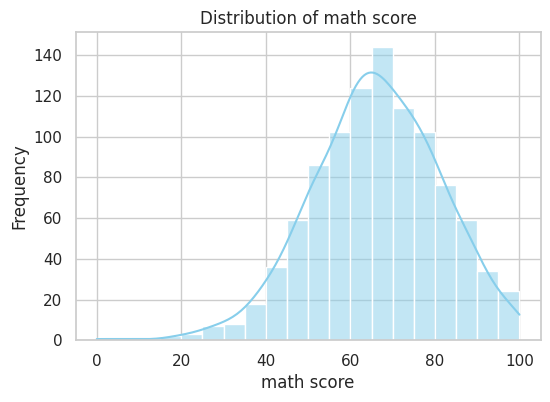

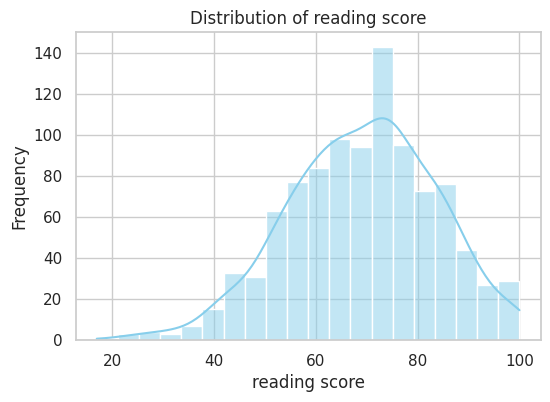

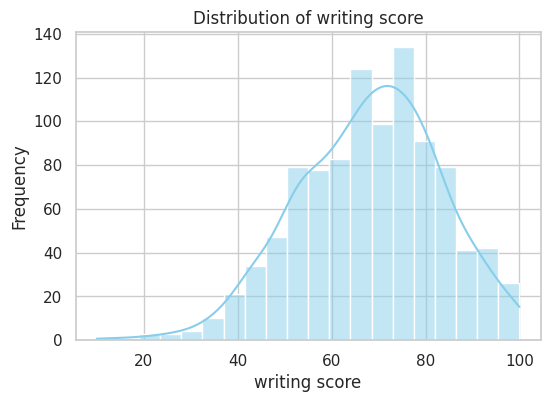

/tmp/ipython-input-567223860.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='Set2')


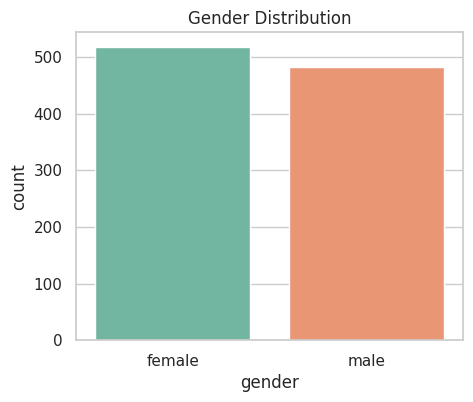

/tmp/ipython-input-567223860.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y=col, data=df, palette='Set3')


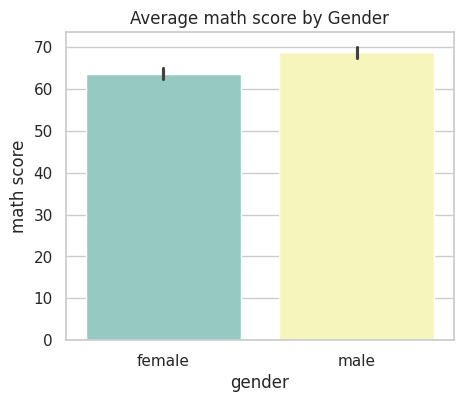

/tmp/ipython-input-567223860.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y=col, data=df, palette='Set3')


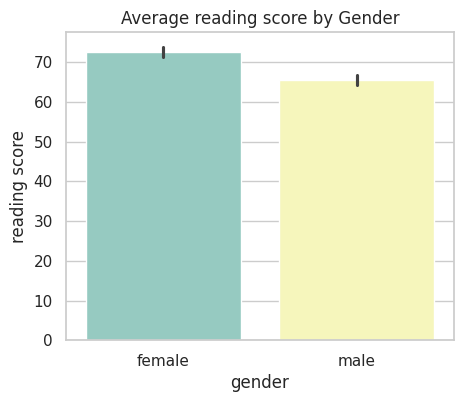

/tmp/ipython-input-567223860.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y=col, data=df, palette='Set3')


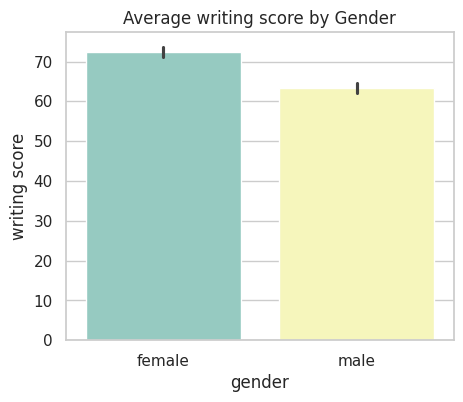

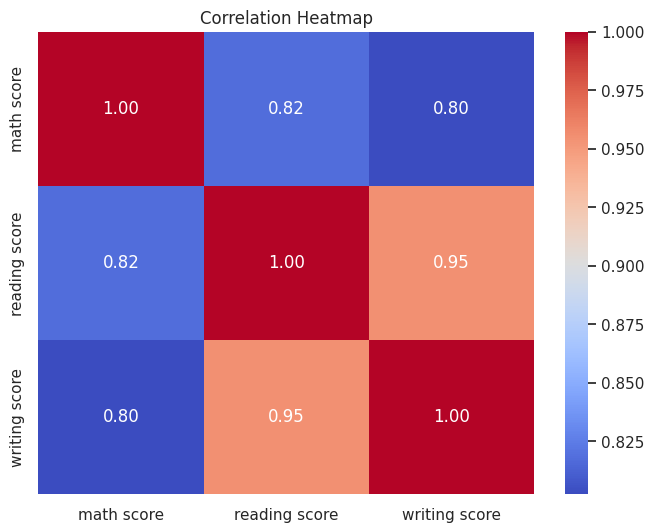

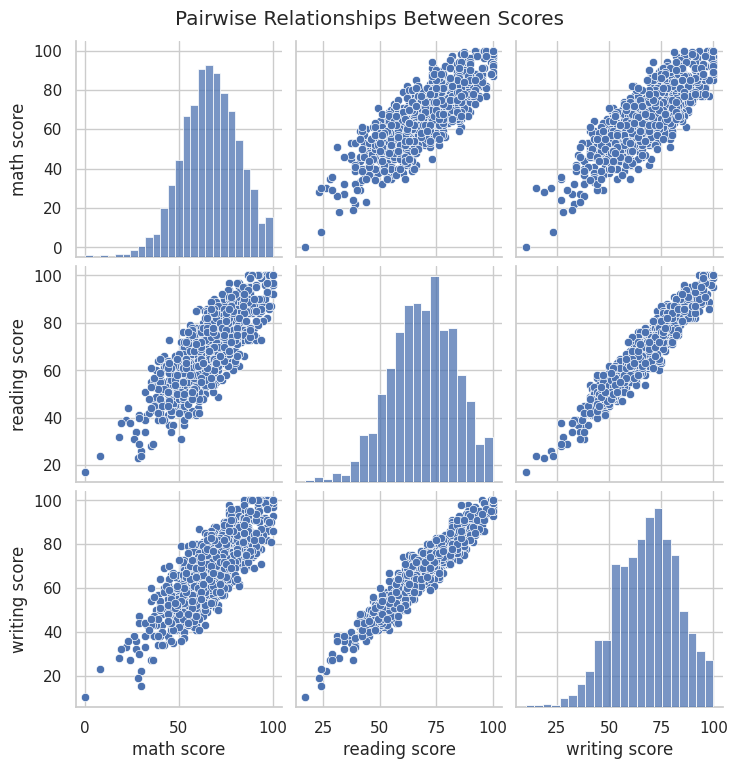

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for seaborn
sns.set(style="whitegrid")

# 1. Distribution of scores (assuming columns like 'math_score', 'reading_score', 'writing_score')
score_columns = [col for col in df.columns if 'score' in col.lower()]
for col in score_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# 2. Gender distribution
if 'gender' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x='gender', data=df, palette='Set2')
    plt.title("Gender Distribution")
    plt.show()

# 3. Average score by gender
if 'gender' in df.columns:
    for col in score_columns:
        plt.figure(figsize=(5,4))
        sns.barplot(x='gender', y=col, data=df, palette='Set3')
        plt.title(f"Average {col} by Gender")
        plt.show()

# 4. Correlation heatmap for numeric columns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 5. Pairplot for numeric variables (only if dataset is small enough)
if len(score_columns) > 1:
    sns.pairplot(df[score_columns])
    plt.suptitle("Pairwise Relationships Between Scores", y=1.02)
    plt.show()

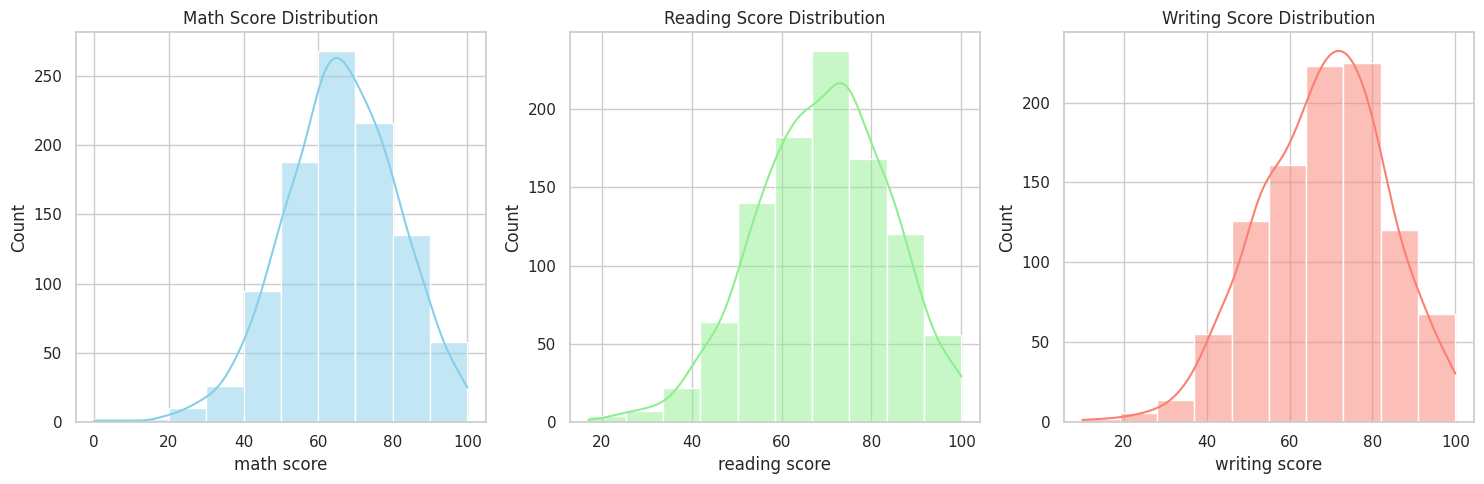

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create histograms for each subject score
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df['math score'], bins=10, kde=True, color='skyblue')
plt.title('Math Score Distribution')

plt.subplot(1,3,2)
sns.histplot(df['reading score'], bins=10, kde=True, color='lightgreen')
plt.title('Reading Score Distribution')

plt.subplot(1,3,3)
sns.histplot(df['writing score'], bins=10, kde=True, color='salmon')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

/tmp/ipython-input-1376629861.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='math score', data=df, palette='pastel')
/tmp/ipython-input-1376629861.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='reading score', data=df, palette='pastel')
/tmp/ipython-input-1376629861.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='writing score', data=df, palette='pastel')


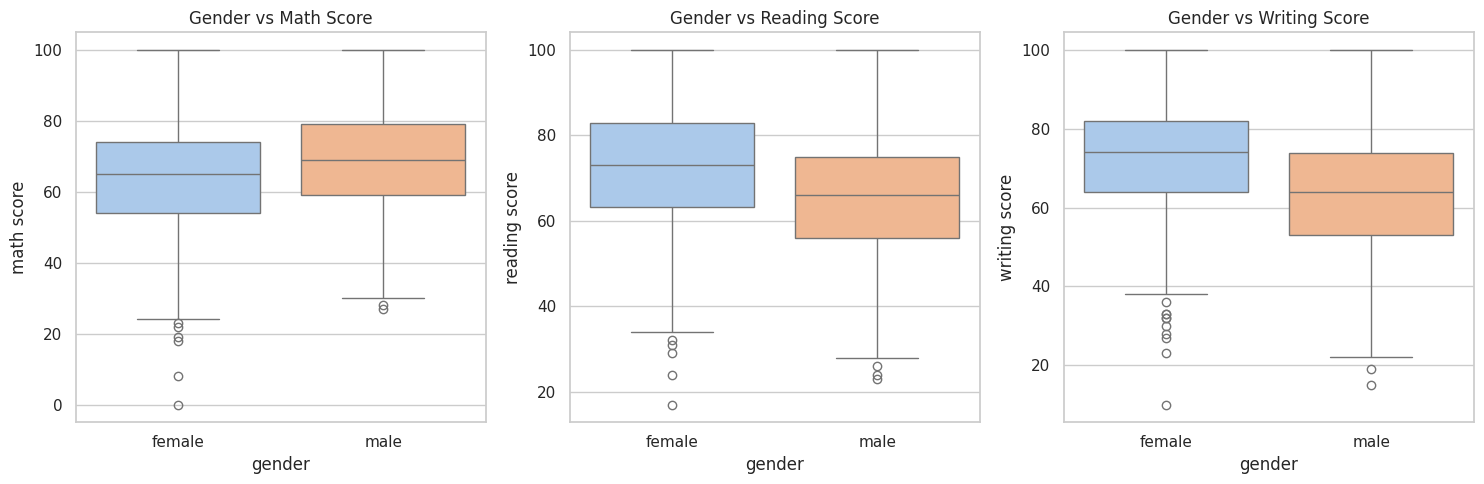

/tmp/ipython-input-1376629861.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of education', y='math score', data=df, palette='coolwarm')


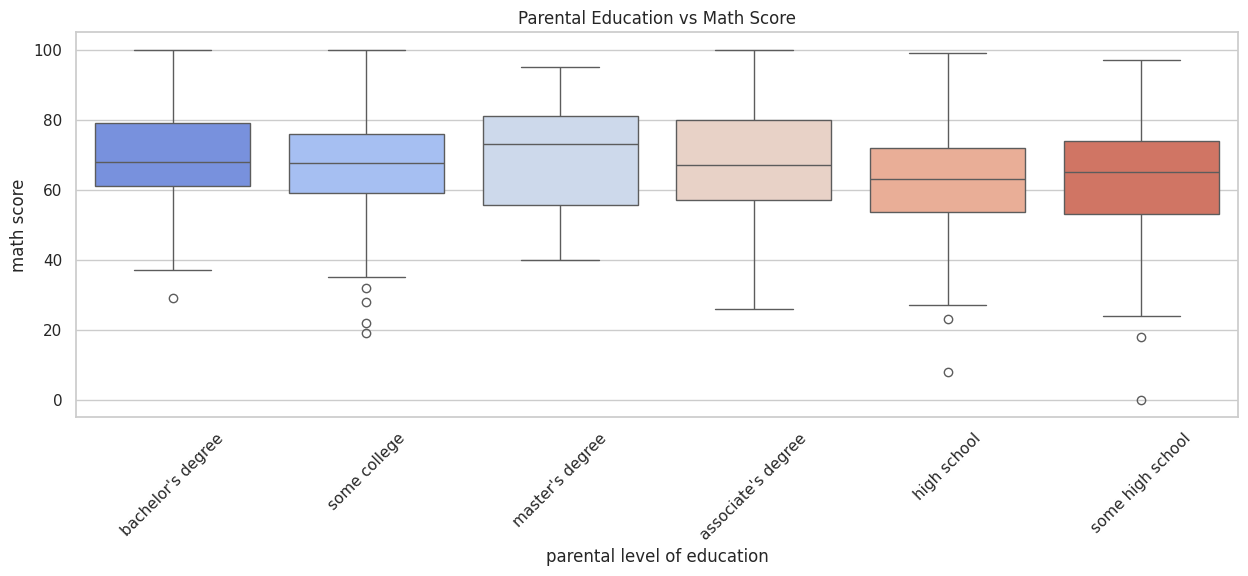

In [ ]:
# Gender vs Scores
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x='gender', y='math score', data=df, palette='pastel')
plt.title('Gender vs Math Score')

plt.subplot(1,3,2)
sns.boxplot(x='gender', y='reading score', data=df, palette='pastel')
plt.title('Gender vs Reading Score')

plt.subplot(1,3,3)
sns.boxplot(x='gender', y='writing score', data=df, palette='pastel')
plt.title('Gender vs Writing Score')

plt.tight_layout()
plt.show()

# Parental Education vs Scores
plt.figure(figsize=(15,5))
sns.boxplot(x='parental level of education', y='math score', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Parental Education vs Math Score')
plt.show()

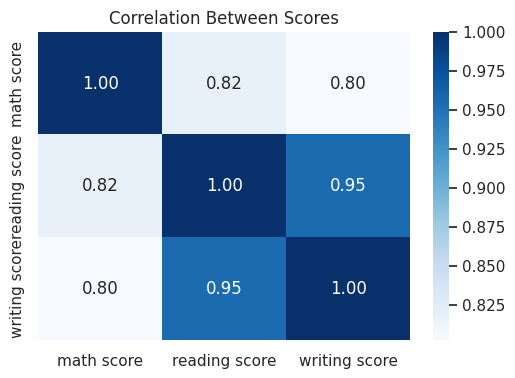

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(),
            annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Between Scores')
plt.show()

/tmp/ipython-input-4055951114.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='gender', y='math score', ci=None)


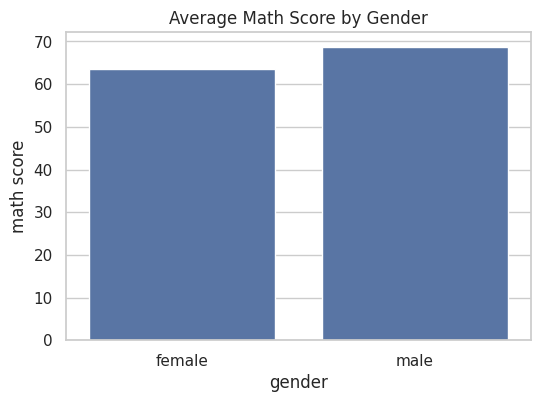

/tmp/ipython-input-4055951114.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='parental level of education', y='reading score', ci=None)


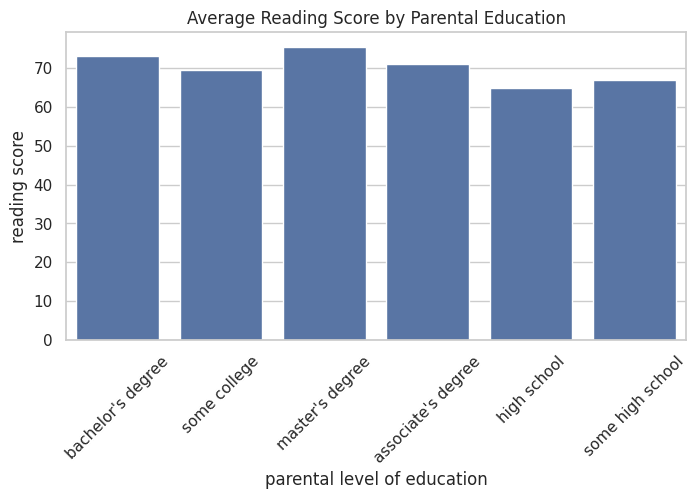

/tmp/ipython-input-4055951114.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='test preparation course', y='writing score', ci=None)


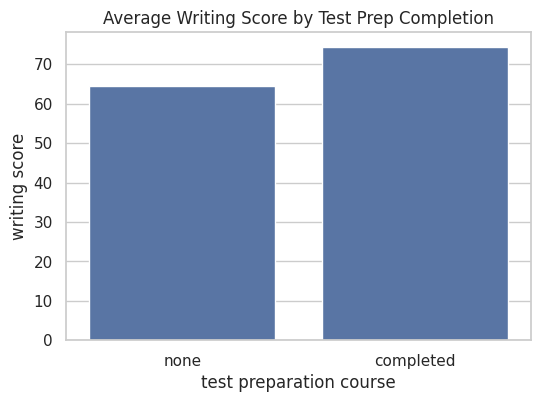

In [ ]:
# Average Scores by Gender
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='gender', y='math score', ci=None)
plt.title('Average Math Score by Gender')
plt.show()

# Average Scores by Parental Level of Education
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='parental level of education', y='reading score', ci=None)
plt.xticks(rotation=45)
plt.title('Average Reading Score by Parental Education')
plt.show()

# Average Scores by Test Preparation Course
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='test preparation course', y='writing score', ci=None)
plt.title('Average Writing Score by Test Prep Completion')
plt.show()

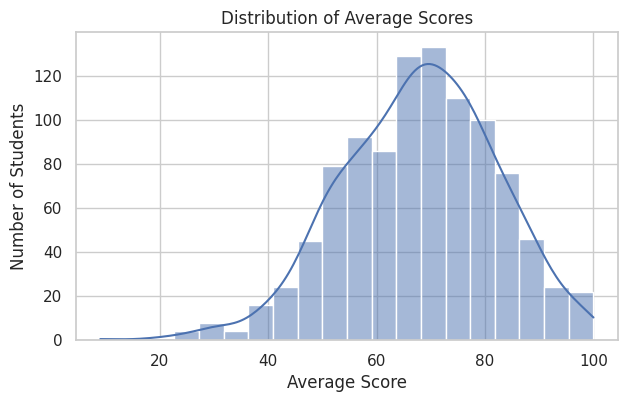

/tmp/ipython-input-3082418179.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='gender', y='average_score', ci=None)


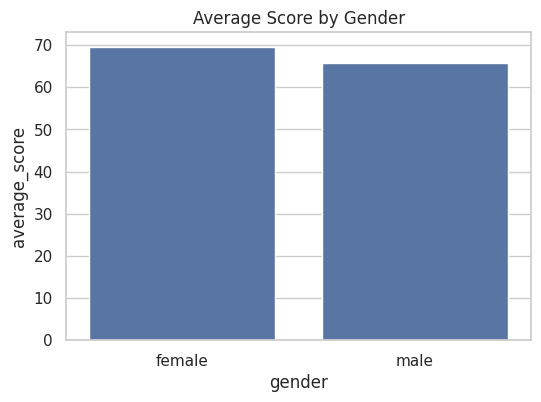

/tmp/ipython-input-3082418179.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='test preparation course', y='average_score', ci=None)


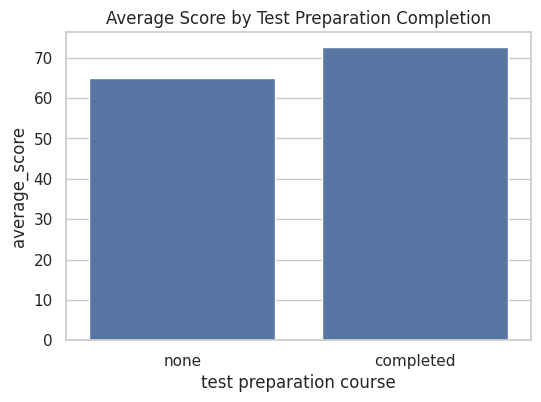

In [ ]:
# Create total and average score columns
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score'] / 3

# Preview updated dataset
df.head()

# Distribution of Average Score
plt.figure(figsize=(7,4))
sns.histplot(df['average_score'], bins=20, kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Number of Students')
plt.show()

# Average Score by Gender
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='gender', y='average_score', ci=None)
plt.title('Average Score by Gender')
plt.show()

# Average Score by Test Preparation
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='test preparation course', y='average_score', ci=None)
plt.title('Average Score by Test Preparation Completion')
plt.show()